<a href="https://colab.research.google.com/github/AlyonaKap/ml-projects/blob/main/Analysis_of_Ceramic_Composition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analysis of Ceramic Chemical Composition + Building Simple ML Models**

Посилання на датасет: [Ceramic](https://archive.ics.uci.edu/dataset/583/chemical+composition+of+ceramic+samples)

Блокнот містить у собі:
*   Описовий аналіз даних.
*   Аналіз збалансованості та аналіз діапазону розподілу значень ознак.
*   Попередню обробку даних.
*   Побудуву модель класифікації. Порівняння їх ефективності.
*   Оцінку точності побудованої моделі на тестових даних. Вимірювання ключових метрик. Висновок.



# Описовий аналіз даних

Завантаження даних

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
df = pd.read_csv('./drive/MyDrive/Colab/Chemical Composion of Ceramic.csv')
df.head()

,Ceramic Name,Part,Na2O,MgO,Al2O3,SiO2,K2O,CaO,TiO2,Fe2O3,MnO,CuO,ZnO,PbO2,Rb2O,SrO,Y2O3,ZrO2,P2O5
0,FLQ-1-b,Body,0.62,0.38,19.61,71.99,4.84,0.31,0.07,1.18,630,10,70,10,430,0,40,80,90
1,FLQ-2-b,Body,0.57,0.47,21.19,70.09,4.98,0.49,0.09,1.12,380,20,80,40,430,-10,40,100,110
2,FLQ-3-b,Body,0.49,0.19,18.60,74.70,3.47,0.43,0.06,1.07,420,20,50,50,380,40,40,80,200
3,FLQ-4-b,Body,0.89,0.30,18.01,74.19,4.01,0.27,0.09,1.23,460,20,70,60,380,10,40,70,210
4,FLQ-5-b,Body,0.03,0.36,18.41,73.99,4.33,0.65,0.05,1.19,380,40,90,40,360,10,30,80,150


Маємо датасет, що містить такі ознаки:


*   Назва зразка кераміки(ідентифікатор)
*   Хімічний склад, у який входять:

Оксиди в масовій частці (%) — Na2O, MgO, Al2O3, SiO2, K2O, CaO, TiO2, Fe2O3

Елементи/сполуки в ppm — MnO, CuO, ZnO, RbO2, SrO, ZrO2, P2O5

Цільовою змінною є Part, тобто тип матеріалу: тіло чи глазур. Нашою задачею і є визначення типу матеріалу відповідно до наведених ознак.



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ceramic Name  88 non-null     object 
 1   Part          88 non-null     object 
 2   Na2O          88 non-null     float64
 3   MgO           88 non-null     float64
 4   Al2O3         88 non-null     float64
 5   SiO2          88 non-null     float64
 6   K2O           88 non-null     float64
 7   CaO           88 non-null     float64
 8   TiO2          88 non-null     float64
 9   Fe2O3         88 non-null     float64
 10  MnO           88 non-null     int64  
 11  CuO           88 non-null     int64  
 12  ZnO           88 non-null     int64  
 13  PbO2          88 non-null     int64  
 14  Rb2O          88 non-null     int64  
 15  SrO           88 non-null     int64  
 16  Y2O3          88 non-null     int64  
 17  ZrO2          88 non-null     int64  
 18  P2O5          88 non-null     in

Сам датасет містить 88 записів(рядків) та 19 атрибутів(колонок). Числові ознаки виражені у числових типах даних, але необхідно буде кодувати категорії таргету.

Перевіримо ще кількість пропусків та дублів

In [ ]:
print(f"Кількість пропущених значень:\n{df.isnull().sum()}")
print(f"\nКількість дублікатів: {df.duplicated().sum()}")

Кількість пропущених значень:
Ceramic Name    0
Part            0
Na2O            0
MgO             0
Al2O3           0
SiO2            0
K2O             0
CaO             0
TiO2            0
Fe2O3           0
MnO             0
CuO             0
ZnO             0
PbO2            0
Rb2O            0
SrO             0
Y2O3            0
ZrO2            0
P2O5            0
dtype: int64

Кількість дублікатів: 0


Статистична інформація

In [ ]:
df.describe()

,Na2O,MgO,Al2O3,SiO2,K2O,CaO,TiO2,Fe2O3,MnO,CuO,ZnO,PbO2,Rb2O,SrO,Y2O3,ZrO2,P2O5
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.00000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,0.471705,0.430114,17.460909,69.825114,4.978409,4.171818,0.10125,1.561591,818.750000,30.909091,95.340909,38.522727,310.454545,228.863636,42.954545,145.454545,440.909091
std,0.348779,0.215030,4.703422,2.754377,0.879467,4.305801,0.05343,0.604276,614.240607,19.096630,33.901441,26.589246,69.809414,256.216646,12.879556,60.074840,402.653944
min,0.030000,0.070000,11.300000,63.880000,2.730000,0.120000,0.04000,0.580000,180.000000,0.000000,20.000000,0.000000,180.000000,-10.000000,20.000000,50.000000,50.000000
25%,0.247500,0.270000,13.007500,67.737500,4.337500,0.180000,0.07000,1.097500,380.000000,20.000000,70.000000,20.000000,250.000000,10.000000,30.000000,100.000000,97.500000
50%,0.375000,0.405000,16.205000,69.990000,5.065000,2.690000,0.08000,1.510000,590.000000,30.000000,90.000000,30.000000,320.000000,75.000000,40.000000,140.000000,365.000000
75%,0.642500,0.530000,21.707500,71.840000,5.590000,7.912500,0.13000,1.925000,982.500000,40.000000,112.500000,60.000000,370.000000,482.500000,50.000000,170.000000,697.500000
max,1.880000,1.320000,26.480000,75.950000,6.740000,13.690000,0.29000,3.110000,2970.000000,80.000000,230.000000,100.000000,450.000000,780.000000,80.000000,390.000000,1610.000000


Середнє значення доволі сильно відрізняються між ознаками: для оксидів це від ~0,5 до ~70, для елементів в ppm від ~30 до ~820, а тому для  моделей, що чутливі до масштабу, необхідно буде застосувати нормалізацію. Слід також звернути увагу на SrO, мінімальне значення якого -10, що схоже на аномалію.

**Висунемо гіпотезу**:

Ознаки з вищим стандартним відхиленням є більш інформативними, адже вони характеризуються більшою варіативністю значень, що зменшує перекриття розподілів.

Для перевірки побудуємо діаграми розподілу суттєвих ознак: будемо брати ті, у яких більше стандартне відхилення.

Діаграми розподілу суттєвих ознак

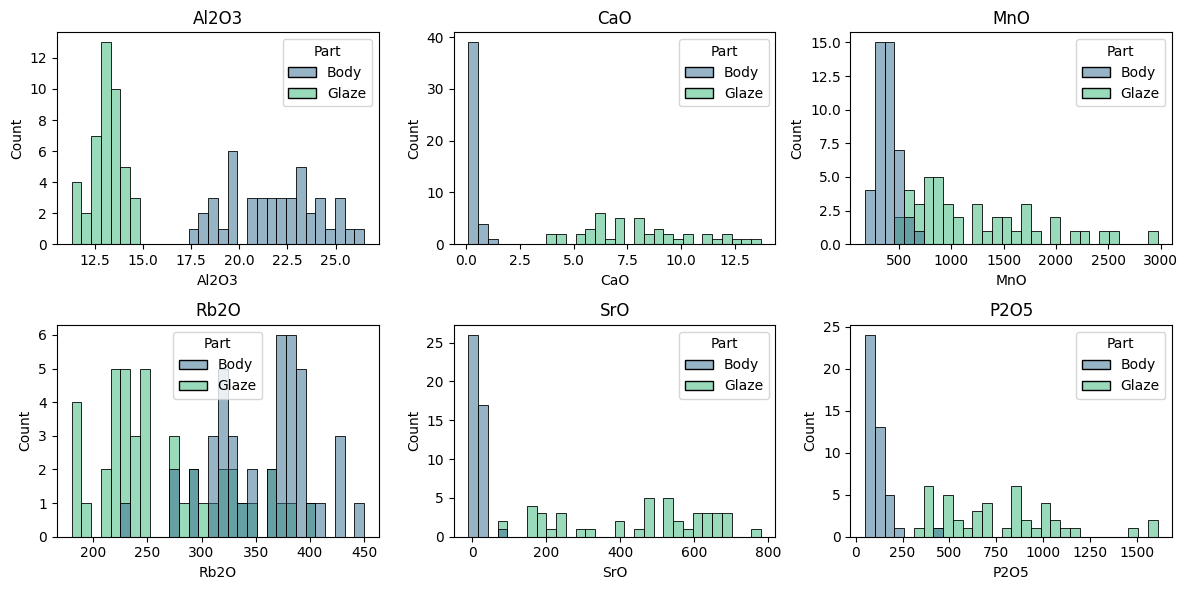

In [ ]:
cols = ['Al2O3', 'CaO', 'MnO', 'Rb2O', 'SrO', 'P2O5']
fig, axes = plt.subplots(2, 3, figsize=(12,6))
axes = axes.flatten()

for col, ax in zip(cols, axes):
  sns.histplot(data = df, x = col, ax=ax, hue = 'Part', palette='viridis',
               bins = 30)
  ax.set_title(col)

plt.tight_layout()

Найголовніше, що можна тут помітити, це чітке розподілення класів. Для більшості елементів розподіли Body та Glaze майже не перетинаються.

Діаграма розподілу цільової змінної

<Axes: xlabel='Part', ylabel='count'>

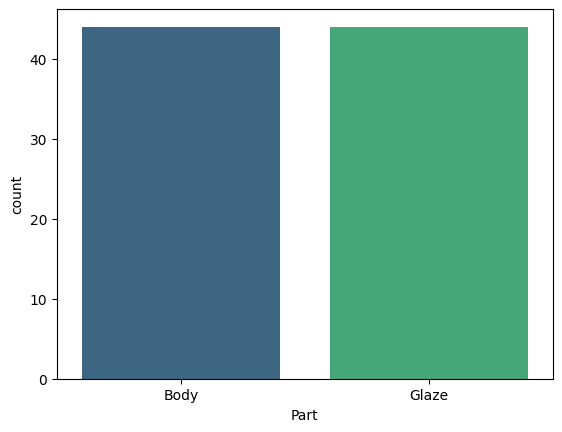

In [ ]:
sns.countplot(df, x = 'Part', hue = 'Part', palette = 'viridis')

Оскільки частки класів Body та Glaze у датасеті рівні, цільова змінна є збалансованою. Тому застосовувати методи балансування не потрібно.

Точкові діаграми взаємного розподілу цільової змінної та інших ознак

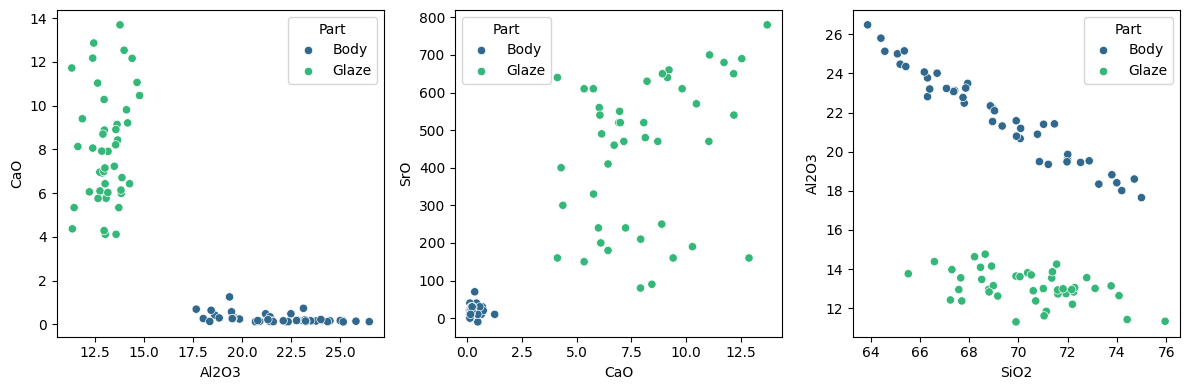

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(12,4))

sns.scatterplot(df, x = 'Al2O3', y = 'CaO', ax  = axes[0], hue = 'Part', palette = 'viridis')
sns.scatterplot(df, x = 'CaO', y = 'SrO', ax  = axes[1], hue = 'Part', palette = 'viridis')
sns.scatterplot(df, x = 'SiO2', y = 'Al2O3', ax  = axes[2], hue = 'Part', palette = 'viridis')

plt.tight_layout()

Можна сказати, що всі ці пари є гарними класифікаторами, оскільки кожна з них демонструє чітке розмежування між класами.

3D діаграми взаємного розподілу

In [ ]:
fig = px.scatter_3d(df, x='SiO2', y='Al2O3', z='CaO',
              color='Part', title='3D розподіл за ознаками: SiO2, Al2O3 та CaO')
fig.show()

У тривимірному просторі також спостерігаємо ідеальне лінійне розділення класів. Хмари точок знаходяться у різних площинах, що може гарантувати високу точність класифікації.

Побудуємо також графіки розподілу в розрізі типу матеріалів для ознак з нищою варіативністю

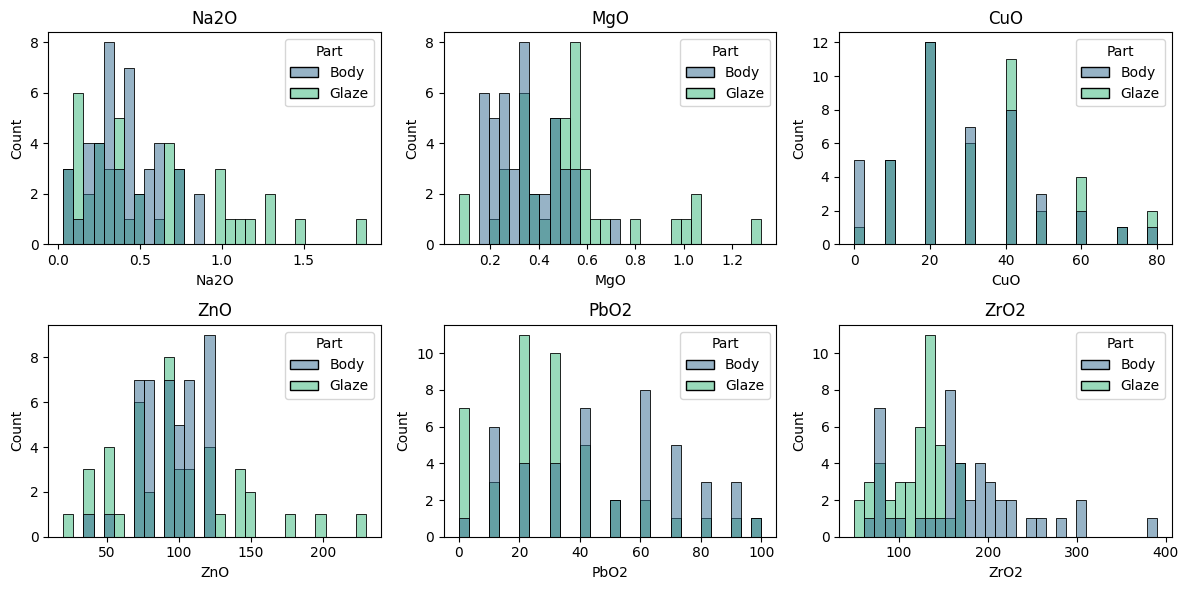

In [ ]:
cols = ['Na2O', 'MgO', 'CuO', 'ZnO', 'PbO2', 'ZrO2']

fig, axes = plt.subplots(2, 3, figsize=(12,6))
axes = axes.flatten()

for col, ax in zip(cols, axes):
  sns.histplot(data = df, x = col, ax=ax, hue = 'Part', palette='viridis',
               bins = 30)
  ax.set_title(col)

plt.tight_layout()

**Висновок щодо гіпотези:**

На графіках ознак із низьким стандартним відхиленням ми спостерігаємо сильне змішування класів. Тобто можна сказати, що у цьому датасеті високе стандартне відхилення у ознаки свідчить про кращу роздільну здатність класів. Це не є загальним правилом, але тут вони чітко ділять всі зразки на дві далекі одна від одної групи.

# Попередня обробка даних

Ми вже досліджували збалансованість класів цільової ознаки - вона не потребує балансування. Хоча й значення варіативних ознак знаходяться в різних діапазонах, будемо будувати моделі не чутливі до масштабу(Random Forest, AdaBoost, XGBoost), тому нормалізація тут не потрібна.

Щодо попередньої обробки, то тут необхідне кодування категорій таргету та можна ще дослідити аномальне значення SrO(-10).

Кодування категоріальних значень

Будемо використовувати one-hot encoding, що можна реалізувати за допомогою pandas методу get_dummies()

In [ ]:
df = pd.get_dummies(df, columns = ['Part'], dtype = int, drop_first = True)
df.head()

,Ceramic Name,Na2O,MgO,Al2O3,SiO2,K2O,CaO,TiO2,Fe2O3,MnO,CuO,ZnO,PbO2,Rb2O,SrO,Y2O3,ZrO2,P2O5,Part_Glaze
0,FLQ-1-b,0.62,0.38,19.61,71.99,4.84,0.31,0.07,1.18,630,10,70,10,430,0,40,80,90,0
1,FLQ-2-b,0.57,0.47,21.19,70.09,4.98,0.49,0.09,1.12,380,20,80,40,430,-10,40,100,110,0
2,FLQ-3-b,0.49,0.19,18.60,74.70,3.47,0.43,0.06,1.07,420,20,50,50,380,40,40,80,200,0
3,FLQ-4-b,0.89,0.30,18.01,74.19,4.01,0.27,0.09,1.23,460,20,70,60,380,10,40,70,210,0
4,FLQ-5-b,0.03,0.36,18.41,73.99,4.33,0.65,0.05,1.19,380,40,90,40,360,10,30,80,150,0


Тепер значення закодовані. Якщо тип матеріалу Glaze, це 1, якщо Body, то 0.

Дослідження аномалії

In [ ]:
df[['SrO','Part_Glaze']].sort_values('SrO')

,SrO,Part_Glaze
1,-10,0
0,0,0
23,0,0
17,0,0
29,0,0
...,...,...
61,660,1
59,680,1
70,690,1
71,700,1


Тобто тут лише одне фізично неможливе значення: описане вище -10, всі інші знаходяться в межах норми. Можемо просто замінити його на 0, так як цьому рядку відповідає значення Body, діапазон вмісту SrO у якому близький до 0.

In [ ]:
df['SrO'] = df['SrO'].replace(to_replace = -10, value = 0)

# Побудова моделей Random Forest, AdaBoost, XGBoost

Будемо порівнювати результати моделі, що побудована на всіх ознаках та на обраних(тих, що показали найкращу роздільну здатність).

Поділ даних на train/test

In [ ]:
X = df.drop(['Ceramic Name', 'Part_Glaze'], axis = 1)
y = df['Part_Glaze']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=35)

Відбір ознак

In [ ]:
features = ['Al2O3', 'CaO', 'MnO', 'SrO', 'P2O5']
Xtr_feat = X_train[features]
Xte_feat = X_test[features]

Крос-валідація

In [ ]:
models = [RandomForestClassifier(), AdaBoostClassifier(), xgb.XGBClassifier()]

for m in models:
  print(f"\n{m.__class__.__name__}")
  scores = cross_val_score(m, X_train, y_train, cv = 5, scoring='accuracy')
  print(f'Cross-validation accuracy scores(all params): {scores}')

  scores = cross_val_score(m, Xtr_feat, y_train, cv = 5, scoring='accuracy')
  print(f'Cross-validation accuracy scores(selected params): {scores}')


RandomForestClassifier
Cross-validation accuracy scores(all params): [1. 1. 1. 1. 1.]
Cross-validation accuracy scores(selected params): [1. 1. 1. 1. 1.]

AdaBoostClassifier
Cross-validation accuracy scores(all params): [1. 1. 1. 1. 1.]
Cross-validation accuracy scores(selected params): [1. 1. 1. 1. 1.]

XGBClassifier
Cross-validation accuracy scores(all params): [1.         1.         1.         0.90909091 1.        ]
Cross-validation accuracy scores(selected params): [1.         1.         1.         0.90909091 1.        ]


Інтерпритовувати результати будемо вже після фінальної оцінки у висновку

# Фінальна оцінка

У якості фінальної оцінки виміряємо Accuracy та виведемо Classification Report(містяться основні метрики: precision, recall, f1-score) та Confusion Matrix(показує кількість TP, TN, FP, FN) на тестових даних.

In [ ]:
for m in models:
    print(f"\n{m.__class__.__name__}")
    print("----------------------------")

    m_all = m
    m_all.fit(X_train, y_train)

    y_pred_all = m_all.predict(X_test)
    print("All params:")
    print("Accuracy:", accuracy_score(y_test, y_pred_all))
    print(classification_report(y_test, y_pred_all))
    print(confusion_matrix(y_test, y_pred_all))

    m_sel = m.__class__()
    m_sel.fit(Xtr_feat, y_train)

    y_pred_sel = m_sel.predict(Xte_feat)
    print("\nSelected params:")
    print("Accuracy:", accuracy_score(y_test, y_pred_sel))
    print(classification_report(y_test, y_pred_sel))
    print(confusion_matrix(y_test, y_pred_sel))


RandomForestClassifier
----------------------------
All params:
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[17  0]
 [ 0 13]]

Selected params:
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[17  0]
 [ 0 13]]

AdaBoostClassifier
----------------------------
All params:
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1 

**Висновок:**

Тож, всі моделі впорались бездоганно: як RandomForestClassifier, XGBClassifier, так і AdaBoostClassifier правильно визначили клас у всіх тестових випадках. Однак, це доволі маленький розмір вибірки(усього 30 семплів), що може не повною мірою відображати варіативність реальних даних та стійкість моделі до нових, раніше не бачених прикладів. До того ж результати крос-валідації показують, що моделі можуть помилятися: XGBClassifier на одному з фолдів зробив помилку, що свідчить про те, що ідеальний результат на тестовій вибірці є частково наслідком вдалого розподілу даних.

Той факт, що моделі на обраних ознаках показали ідентичний результат до моделей на повному наборі, як і при крос-валідації, так і при оцінці на тестових даних, дозволяє зробити такий висновок: використання лише ключових хімічних елементів є достатнім для ефективної класифікації.

У описі датасету було зазначено таке завдання: визначити хімічні сполуки, які є найсильнішими пояснювальними змінними для класифікації зразків. З огляду на описовий аналіз даних та фінальне тестування моделей, можна сказати, що такими сполуками є Al2O3, CaO, MnO, SrO та P2O5, адже вони мають найкращу роздільну здатність.
